In [1]:
# Import the necessary libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
# Import the data
df = pd.read_csv("listings-03-29-21-09.csv")


In [5]:
df.dtypes

Category                 object
Yard                     object
Parking Type             object
heating                  object
State                    object
City                     object
Zip                      object
Seller Type              object
School District          object
Seller Accepts Texts       bool
Photo Count               int64
Year Built               object
Title                    object
Acres                    object
Square Feet              object
Newly Built                bool
Seller ID                 int64
AD ID                     int64
Time Posted              object
Asking Price              int64
Package Type             object
Exterior Material        object
cooling                  object
Bathrooms               float64
Bedrooms                 object
Ad Status                object
Special Features         object
Floor Covering           object
Basement Type            object
Included Appliances      object
mls number               object
dtype: o

In [6]:
# Adjust formats as needed

# Adjust improper strings to NaN
df['Acres'] = pd.to_numeric(df['Acres'], errors='coerce')
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')
df['Year Built'] = pd.to_numeric(df['Year Built'], errors='coerce', downcast='integer')
df['Square Feet'] = pd.to_numeric(df['Square Feet'], errors='coerce', downcast='integer')

# Adjust some features to categories
df['Seller Type'] = df['Seller Type'].astype('category')
df['cooling'] = df['cooling'].astype('category')
df['heating'] = df['heating'].astype('category')
# df['Basement Type'] = df['Basement Type'].astype('category')
df['Category'] = df['Category'].astype('category')


In [7]:
# Break some categories into more nuanced ones
df['Carpet'] = pd.np.where(df['Floor Covering'].str.contains("carpet"), True, False)
df['Hard Wood'] = pd.np.where(df['Floor Covering'].str.contains("hardwood"), True, False)
df['Tile'] = pd.np.where(df['Floor Covering'].str.contains("tile"), True, False)
df['Laminate'] = pd.np.where(df['Floor Covering'].str.contains("laminate"), True, False)

df['Finished Basement'] = pd.np.where(df['Basement Type'].str.contains("full finished|full partially finished"), True, False)

df['Garage'] = pd.np.where(df['Parking Type'].str.contains("garage"), True, False)

df['Fireplace'] = pd.np.where(df['Special Features'].str.contains("fireplace"), True, False)
df['Deck'] = pd.np.where(df['Special Features'].str.contains("deck"), True, False)
df['Sprinklers'] = pd.np.where(df['Special Features'].str.contains("sprinklers"), True, False)
df['Pool'] = pd.np.where(df['Special Features'].str.contains("pool"), True, False)

df['By Owner'] = pd.np.where(df['Seller Type'].str.contains("by owner"), True, False)

df['Washer'] = pd.np.where(df['Included Appliances'].str.contains("washer"), True, False)
df['Dryer'] = pd.np.where(df['Included Appliances'].str.contains("dryer"), True, False)

df['Fenced'] = pd.np.where(df['Yard'].str.contains("fenced full|fenced partial"), True, False)
df['Landscape'] = pd.np.where(df['Yard'].str.contains("landscape full|landscape partial|landscape front|landscape back"), True, False)

df['Central Air'] = pd.np.where(df['cooling'].str.contains("central air"), True, False)

df['Brick'] = pd.np.where(df['Exterior Material'].str.contains("brick"), True, False)
df['Stucco'] = pd.np.where(df['Exterior Material'].str.contains("stucco"), True, False)

In [9]:
# Drop Non-Utah Listings
df = df[df['State'] == "ut"]

# Drop useless features
uselessFeatures = ['Ad Status', 'Package Type', 'mls number', 'AD ID', 'Title']
df = df.drop(uselessFeatures, axis=1)

# Obsolete because we formed simple boolean columns from them
obsoleteFeatures = ['State', 'Exterior Material', 'Parking Type', 'cooling', 'heating', 'Basement Type', 'Seller Type', 'Included Appliances']
df = df.drop(obsoleteFeatures, axis=1)


# Drop Extreme price outliers (between 50k and 5m)
df = df[df['Asking Price'] < 5000000] 
df = df[df['Asking Price'] > 50000]

# Drop improper years
df = df[df['Year Built'] > 1850]

# Drop extremely high/low Sqaure Feet listings (11000sqft = .25 acre (roughly))
df = df[df['Square Feet'] < 11000]
df = df[df['Square Feet'] > 500]



In [11]:
# Save the newly formatted DataFrame to a csv again
df.to_csv (r'export_dataframe.csv', index = None, header=True) 


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


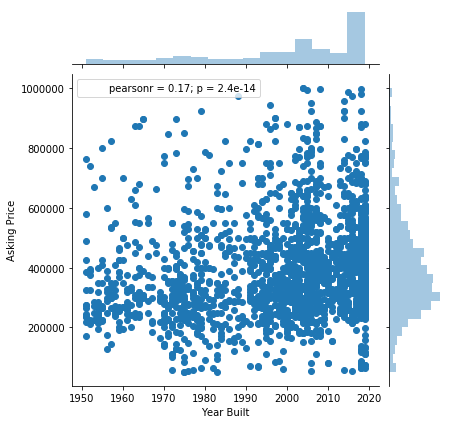

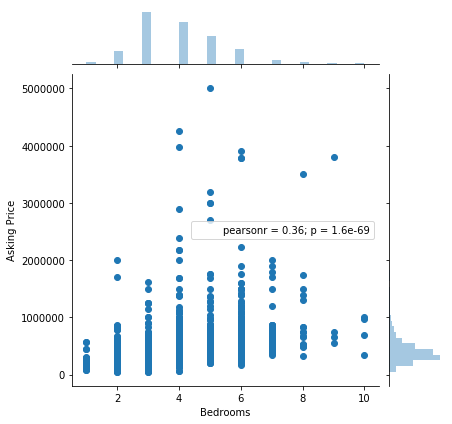

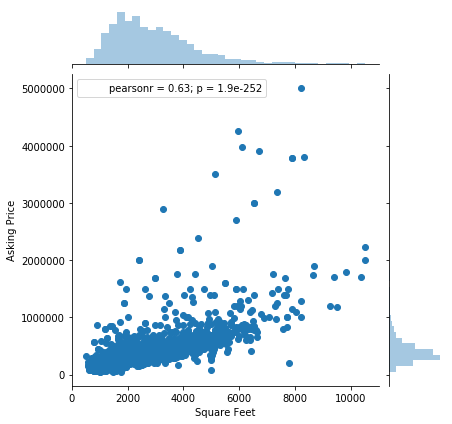

In [10]:
# Initial EDA Charts
# sns.distplot(df['Asking Price'], fit=stats.norm)
# df[df['Asking Price'] > 5000000]

sns.jointplot(x="Year Built", y="Asking Price", data=df[(df['Year Built'] > 1950) & (df['Asking Price'] < 1000000)])

sns.jointplot(x="Bedrooms", y="Asking Price", data=df)

sns.jointplot(x="Square Feet", y="Asking Price", data=df)

